In [1]:
class A:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __repr__(self):
        return "<A(a={self.a}, b={self.b})>".format(self=self)
    
    def __call__(self, g):
        return g + 3
    
    def _repr_html_(self):
        return "<h1 style='color: red'>Hi</h1>"
    
        
a = A(3, 4)
a

<A(a=3, b=4)>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/mohammad/anaconda3/envs/workshop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mohammad/anaconda3/envs/workshop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mohammad/anaconda3/envs/workshop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/mohammad/anaconda3/envs/workshop/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


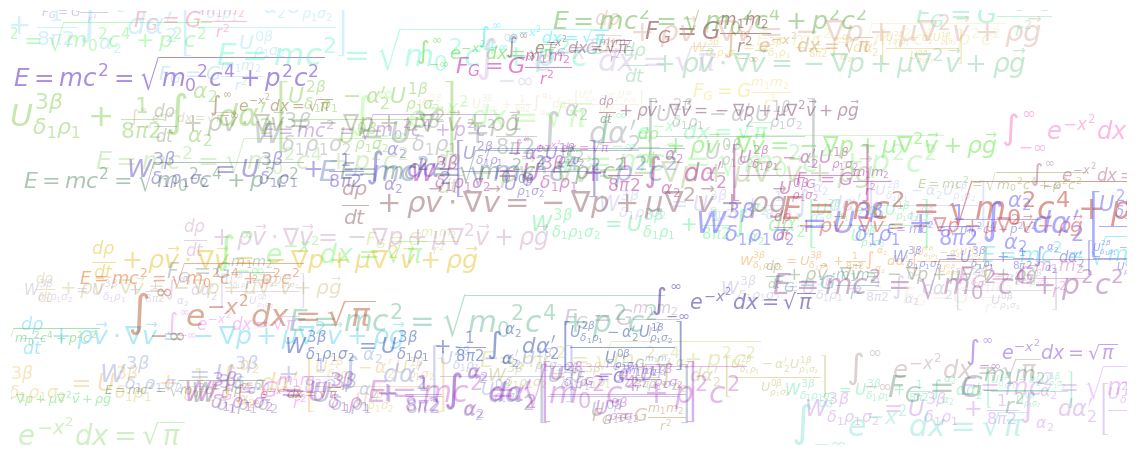

In [66]:
eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))

fig, ax = plt.subplots(figsize=(20, 8))
sns.despine(left=True, bottom=True, ax=ax)

how_many = 30
for i in range(how_many):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 32)
    x,y = np.random.uniform(0, 1, 2)
    color = np.random.rand(3,)
    alpha = np.random.uniform(0.25, .5)
    ax.text(x, y, eq, ha='center', va='center', transform=ax.transAxes, color=color, alpha=alpha, fontsize=size, clip_on=True)
    
plt.xticks([])
plt.yticks([])

plt.show()

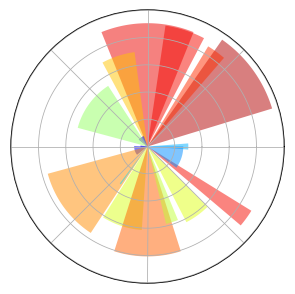

In [34]:
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)

N = 20
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

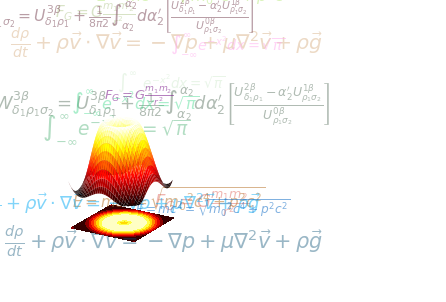

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)
ax.set_xlim(-4, 20)
ax.set_ylim(-4, 20)
ax.set_axis_off()

how_many = 30
for i in range(how_many):
    index = np.random.randint(0, len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12, 22)
    x,y,z = np.random.uniform(-3, 10, 3)
    color = np.random.rand(3,)
    alpha = np.random.uniform(0.25, .6)
    ax.text(x, y, z, eq, ha='center', va='center', color=color, alpha=alpha, fontsize=size)

plt.show()

---

## Generating Data for Pandas tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from faker import Faker
fake = Faker()

In [51]:
N = 300

In [89]:
names = np.array([fake.name() for _ in range(N)])

sex = np.random.choice(['Female', 'Male'], size=(N))

from_Germany = np.random.choice([False, True], size=(N))

MPI = np.random.choice(['Biochem', 'Neuro'], size=N)

age = np.zeros(N)
age[from_Germany] = np.random.randn(len(age[from_Germany])) * 2 + 28
age[~from_Germany] = np.random.randn(len(age[~from_Germany])) * 4 + 35

papers = np.zeros(N)
papers[MPI == 'Biochem'] = (age[MPI == 'Biochem'] + np.random.randn(len(papers[MPI == 'Biochem'])) * age.mean() / 5) * .3
papers[MPI == 'Neuro'] = (age[MPI == 'Neuro'] + (np.random.randn(len(papers[MPI == 'Neuro'])) + 2) * age.mean() / 3) * .2
papers = papers.astype(np.int)

# effect of gender in number of papers
papers[(sex == 'Female') & (MPI=='Biochem')] += 2
papers[(sex == 'Male') & (MPI=='Neuro')] += 5

citations = np.zeros(N)
citations[MPI=='Biochem'] = 8 * (papers[MPI=='Biochem'] + 3 * np.random.randn(len(papers[MPI=='Biochem'])))
citations[MPI=='Neuro'] = 15 * (papers[MPI=='Neuro'] + 3 * np.random.randn(len(papers[MPI=='Neuro'])))
citations = citations.astype(np.int)

colleagues = np.zeros(N)
colleagues = .3 * papers + .01 * citations
colleagues = colleagues.astype(np.int)

coffees = np.zeros(N)
coffees[sex == 'female'] = np.random.randint(0, 4, size=(len(coffees[sex == 'female'])))
coffees[sex == 'Male'] = np.random.randint(0, 8, size=(len(coffees[sex == 'Male'])))
coffees = coffees.astype(np.int)

In [90]:
df = pd.DataFrame()
attrs = [names, sex, from_Germany, MPI, age, papers, citations, colleagues, coffees]
cols = ['name', 'sex', 'from_Germany', 'MPI', 'age', 'papers', 'citations', 'colleagues', 'coffees']
for attr, col in zip(attrs, cols):
    df[col] = attr

In [91]:
df.to_csv('MPI-info.csv', index=False)